In [1]:
import geopandas as gpd

## Reading geospatial data with GeoPandas

### Filtering using the mask parameter

In [2]:
# Read in the US States file from the Census Tiger Files saved as a zip
states_zip = r"G:\My Drive\Geospatial Data Science with Python\Data\tl_2021_us_state.zip"
us_states = gpd.read_file(states_zip)

# Filter the US States file to be just California
california = us_states[us_states['NAME']=="California"] 

# Show the dataframe  
california.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
13,4,9,06,01779778,06,CA,California,00,G4000,A,403671756816,20293573058,+37.1551773,-119.5434183,"MULTIPOLYGON (((-116.10617 32.61848, -116.1085..."


In [3]:
# Read in the US Census Bureau CBSAs 
zipped_file = r"G:\My Drive\Geospatial Data Science with Python\Data\tl_2021_us_cbsa.zip"

# Create a new geopandas dataframe that only includes the CBSAs that are in California using the geopandas mask parameter and passing the previously defined california geopandas dataframe
ca_cbsas = gpd.read_file(zipped_file, mask=california)

# Show the first 5 records of the ca_cbsas geopandas dataframe
ca_cbsas.head()

,CSAFP,CBSAFP,GEOID,NAME,NAMELSAD,LSAD,MEMI,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,None,12540,12540,"Bakersfield, CA","Bakersfield, CA Metro Area",M1,1,G3110,21068632654,78405068,+35.3466288,-118.7295064,"POLYGON ((-118.88168 34.81785, -118.88204 34.8..."
1,None,15060,15060,"Brookings, OR","Brookings, OR Micro Area",M2,2,G3110,4217489863,934614482,+42.4664387,-124.2109292,"POLYGON ((-123.82239 42.15933, -123.82246 42.1..."
2,None,17340,17340,"Clearlake, CA","Clearlake, CA Micro Area",M2,2,G3110,3254452700,188748214,+39.0948019,-122.7467569,"POLYGON ((-122.41579 38.76800, -122.41584 38.7..."
3,None,18860,18860,"Crescent City, CA","Crescent City, CA Micro Area",M2,2,G3110,2606118035,578742633,+41.7499033,-123.9809983,"POLYGON ((-124.31611 41.72839, -124.33061 41.7..."
4,456,22280,22280,"Fernley, NV","Fernley, NV Micro Area",M2,2,G3110,5187939862,59489121,+39.0222125,-119.1974246,"POLYGON ((-118.90650 38.51631, -118.90649 38.5..."


In [4]:
len(ca_cbsas)

46

### Filtering using the bounding box parameter

In [5]:
# Defining the bounding box
bounding_box = (-123.82239, 42.15933, -123.82246, 38.7)

#Reading in the CA_CBSAs and filtering based on the bounding box
cbsas_bbox = gpd.read_file(zipped_file, bbox=bounding_box)

# Showing the first 5 rows of the filtered dataframe
cbsas_bbox.head()

,CSAFP,CBSAFP,GEOID,NAME,NAMELSAD,LSAD,MEMI,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,None,15060,15060,"Brookings, OR","Brookings, OR Micro Area",M2,2,G3110,4217489863,934614482,+42.4664387,-124.2109292,"POLYGON ((-123.82239 42.15933, -123.82246 42.1..."
1,None,18860,18860,"Crescent City, CA","Crescent City, CA Micro Area",M2,2,G3110,2606118035,578742633,+41.7499033,-123.9809983,"POLYGON ((-124.31611 41.72839, -124.33061 41.7..."
2,None,21700,21700,"Eureka-Arcata, CA","Eureka-Arcata, CA Micro Area",M2,2,G3110,9241565229,1253726036,+40.7066554,-123.9261757,"POLYGON ((-124.36704 40.67227, -124.36080 40.6..."
3,366,24420,24420,"Grants Pass, OR","Grants Pass, OR Metro Area",M1,1,G3110,4244080762,5631773,+42.3869829,-123.5716197,"POLYGON ((-123.23109 42.12807, -123.23108 42.1..."
4,None,46380,46380,"Ukiah, CA","Ukiah, CA Micro Area",M2,2,G3110,9082632466,961740401,+39.4323876,-123.4428811,"POLYGON ((-123.23896 38.80856, -123.24382 38.8..."


## Writing geospatial data with GeoPandas

In [6]:
# Setting the folder we want to write the output data to
out_path = r"G:\My Drive\Geospatial Data Science with Python\Data\\"

# Writing out the data as a shape file
ca_cbsas.to_file(out_path+"ca_cbsas.shp")

In [7]:
# Setting the folder we want to write the output data to
out_path = r"G:\My Drive\Geospatial Data Science with Python\Data\\"

# Writing out the data as a shape file
cbsas_bbox.to_file(out_path+"cbsas_bbox.geojson", driver="GeoJSON")

## Ploting Geospatial Data

<AxesSubplot:>

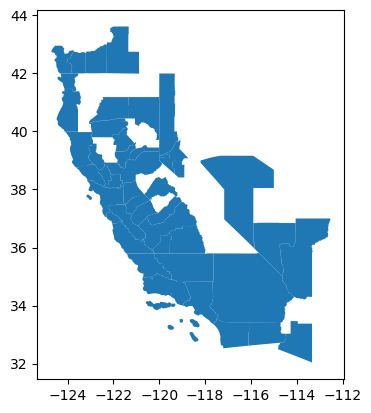

In [8]:
# Basic map of California CBSAs
ca_cbsas.plot()

<AxesSubplot:>

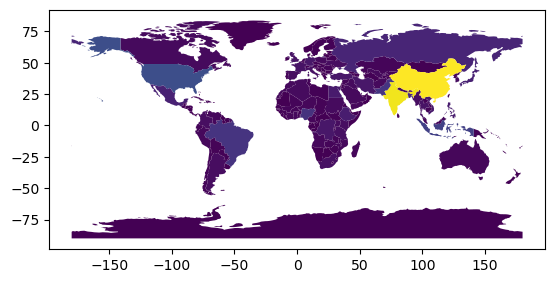

In [9]:
# Choropleth Map of the world's population 

# Reading in the natural earth lowres data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting the data colored by the pop_est GeoSeries
world.plot(column='pop_est')

In [10]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [11]:
continents = world.dissolve(by="continent")
continents.head()

,geometry,pop_est,name,iso_a3,gdp_md_est
continent,,,,,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",58005463.0,Tanzania,TZA,63177
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",4490.0,Antarctica,ATA,898
Asia,"MULTIPOLYGON (((48.67923 14.00320, 48.23895 13...",18513930.0,Kazakhstan,KAZ,181665
Europe,"MULTIPOLYGON (((-53.55484 2.33490, -53.77852 2...",144373535.0,Russia,RUS,1699876
North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421...",37589262.0,Canada,CAN,1736425


<AxesSubplot:>

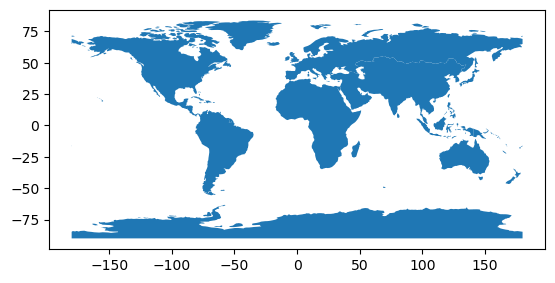

In [12]:
continents.plot()

### Geocoding

In [13]:
import pandas as pd
dc_attractions = pd.read_csv(r'G:\My Drive\Geospatial Data Science with Python\Data\DC_Attractions.csv')
dc_attractions.head()

,Attraction,Address
0,Washington Monument,"2 15th St NW, Washington, DC 20024"
1,Smithsonian National Air and Space Museum,"600 Independence Ave SW, Washington, DC 20560"
2,White House,"1600 Pennsylvania Avenue NW, Washington, DC 20500"


In [14]:
from geopandas.tools import geocode

# Geocode addresses using Nominatim. Remember to provide a custom "application name" in the user_agent parameter!
dc_attractions_gpd = geocode(dc_attractions['Address'], provider='openmapquest', timeout=4, api_key="ZO5OH4wdsrGzmZL75HR5zKqcy9bUF0P9")
dc_attractions_gpd.head()

,geometry,address
0,POINT (-77.03459 38.90178),"15th Street NW, Golden Triangle, Washington, D..."
1,POINT (-77.03771 38.88772),"Independence Avenue Southwest, Penn Quarter, W..."
2,POINT (-77.03655 38.89772),"1600, Pennsylvania Avenue Northwest, Golden Tr..."


<AxesSubplot:>

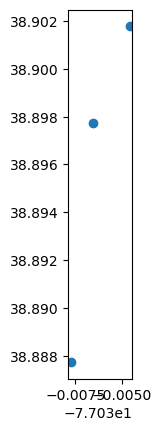

In [16]:
dc_attractions_gpd.plot()